# Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

# EDA

In [2]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1', header = None, names = ['target', 'ID', 'date', 'flag','user','text'])
# I tried exploring the data without adding the encoding part
# it has thrown an error which made me change the encoding
df.head(5)

,target,ID,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.shape

(1600000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ID      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Check for missing values

In [5]:
df.isna().sum()

target    0
ID        0
date      0
flag      0
user      0
text      0
dtype: int64

## Check duplicates

In [6]:
df.duplicated().sum()

0

## Start visualizing

In [7]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

*The dataset are equally distributed*

but note: their are no nautral (2) in the dataset

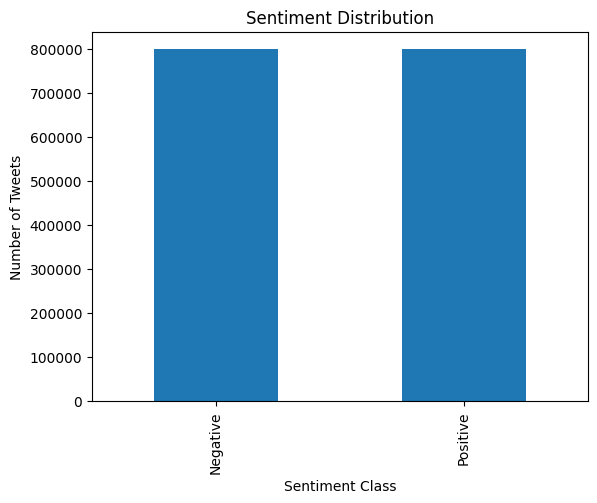

In [8]:
df['target'].map({0: 'Negative', 4: 'Positive'}).value_counts().plot(
    kind="bar", 
    title="Sentiment Distribution"
)
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Tweets")
plt.show()

In [9]:
##example of the tweets
example = df["text"][10]
print(example)
print("Target: ", df['target'][10])

spring break in plain city... it's snowing 
Target:  0


In [10]:
df['tweet_word_length'] = df['text'].apply(lambda x: len(x.split()))
df.head()

,target,ID,date,flag,user,text,tweet_word_length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21


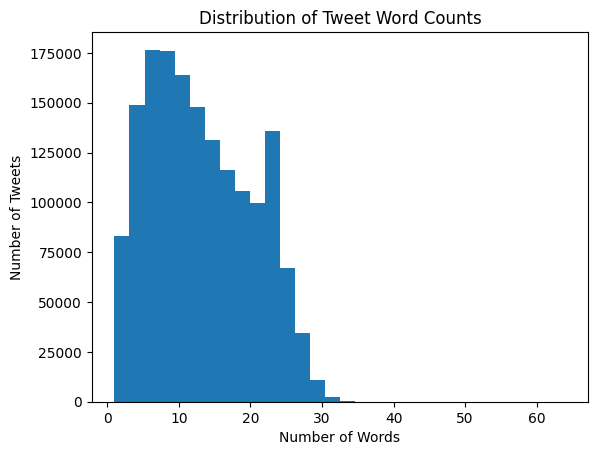

In [11]:
df["tweet_word_length"].plot(
    kind="hist", 
    bins=30, 
    title="Distribution of Tweet Word Counts"
)
plt.xlabel("Number of Words")
plt.ylabel("Number of Tweets")
plt.show()

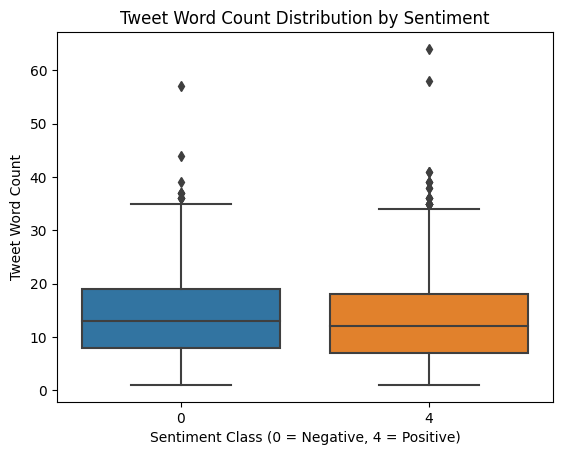

In [12]:
import seaborn as sns

sns.boxplot(x=df["target"], y=df["tweet_word_length"])
plt.xlabel("Sentiment Class (0 = Negative, 4 = Positive)")
plt.ylabel("Tweet Word Count")
plt.title("Tweet Word Count Distribution by Sentiment")
plt.show()

### Using Boxplot to compare Between Classes

* Both negative (0) and positive (4) distributions look very similar.

* Median almost the same.

* Spread nearly identical.

* Outliers on both sides go up to ~60 words.

👉 Interpretation: tweet length does not differ much by sentiment in this dataset.
So length is not a strong predictor of sentiment here.

In [13]:
#explore the outliers

outliers = df[df["tweet_word_length"] > 40]
print(outliers["text"].iloc[0])
print("Target:",outliers["target"].iloc[0])

Is the saddest zornes ever thanks to the magic ( :  ( :  ( :  ( :  ( :  (  :  ( :  ( :  ( :  ( :  ( :  ( :  ( :  ( :  ( :  ( :  ( :   ...
Target: 0


In [14]:
outliers.head()

,target,ID,date,flag,user,text,tweet_word_length
461028,0,2174350763,Sun Jun 14 22:22:19 PDT 2009,NO_QUERY,zorilla87,Is the saddest zornes ever thanks to the magic...,44
770356,0,2301963945,Tue Jun 23 16:09:03 PDT 2009,NO_QUERY,jessicajonassss,I'm so boreeeeed. . . . . . . . . . . . . . . ...,57
981534,4,1834123560,Mon May 18 01:43:09 PDT 2009,NO_QUERY,mythor,@ajayrochester DO IT DO IT DO IT DO IT DO IT D...,41
1006771,4,1880642552,Fri May 22 01:58:41 PDT 2009,NO_QUERY,dr_nigel,"If E x N = 12, L + X = 4 and K-T = 1. What doe...",41
1079511,4,1968081246,Fri May 29 20:43:30 PDT 2009,NO_QUERY,girgely,? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?...,58


# Data Cleaning

### Our Steps:

1. Lowercase

2. Remove URLs

3. Remove mentions (@user)

4. remove the # but keep the word (e.g., #happy → happy)

5. Remove special characters/punctuation

6. Remove extra whitespace

In [15]:
import re

def clean_tweet(text):
    #lower case
    text = text.lower()

    #remove URLs
    text = re.sub(r'http\S+|www+\S+','',text)

    #remove mentions
    text = re.sub(r'@\w+','',text)

    #handle hushtags
    text = re.sub(r'#\w+', '', text)

    #remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^a-z0-9\s]', '', text)

    #remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [16]:
# Check if our function works well
print("Before Cleaning:\n")
print(outliers['text'].iloc[0],"\n")
print("After Cleaning:\n")
print(clean_tweet(outliers['text'].iloc[0]))

Before Cleaning:

Is the saddest zornes ever thanks to the magic ( :  ( :  ( :  ( :  ( :  (  :  ( :  ( :  ( :  ( :  ( :  ( :  ( :  ( :  ( :  ( :  ( :   ... 

After Cleaning:

is the saddest zornes ever thanks to the magic


In [17]:
df['clean_text'] = df['text'].apply(clean_tweet)

In [18]:
df['tweet_word_length_After_Cleaning'] = df['clean_text'].apply(lambda x: len(x.split()))
df.head()

,target,ID,date,flag,user,text,tweet_word_length,clean_text,tweet_word_length_After_Cleaning
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,a thats a bummer you shoulda got david carr of...,16
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,is upset that he cant update his facebook by t...,21
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,i dived many times for the ball managed to sav...,17
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,my whole body feels itchy and like its on fire,10
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21,no its not behaving at all im mad why am i her...,20


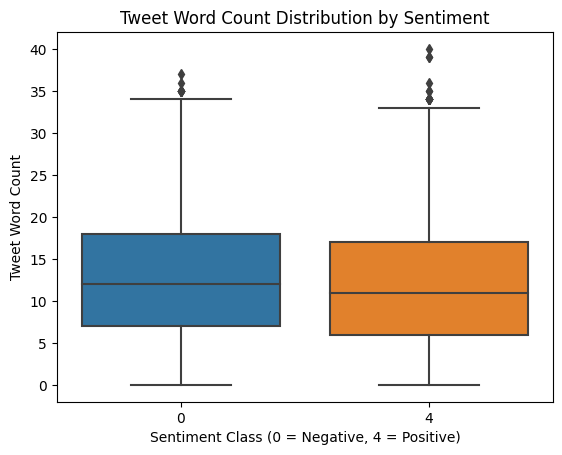

In [19]:
sns.boxplot(x=df["target"], y=df["tweet_word_length_After_Cleaning"])
plt.xlabel("Sentiment Class (0 = Negative, 4 = Positive)")
plt.ylabel("Tweet Word Count")
plt.title("Tweet Word Count Distribution by Sentiment")
plt.show()

# VADER Seniment

In [20]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.8 MB/s eta 0:00:00


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create analyzer object
vader_analyzer = SentimentIntensityAnalyzer()

In [22]:
vader_analyzer.polarity_scores("I'm sad")

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [23]:
def vader_results(text):
    scores = vader_analyzer.polarity_scores(text)
    compound = scores['compound']
    return 4 if compound > 0 else 0 

In [24]:
df["vader_sentiment"] = df["clean_text"].apply(vader_results)

In [25]:
df["vader_sentiment"].value_counts()

vader_sentiment
0    845154
4    754846
Name: count, dtype: int64

## Evaluate Vader

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_true = df["target"]
y_pred = df["vader_sentiment"]

# evaluation
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.65192

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66    800000
           4       0.66      0.62      0.64    800000

    accuracy                           0.65   1600000
   macro avg       0.65      0.65      0.65   1600000
weighted avg       0.65      0.65      0.65   1600000


Confusion Matrix:
 [[544113 255887]
 [301041 498959]]


### Vader Results

he VADER sentiment analyzer on the dataset, we achieved an overall accuracy of ~65% when classifying into positive (4) and negative (0) sentiments. However, the dataset originally contains only binary labels (0 and 4), while VADER also outputs a neutral class (2). This mismatch required filtering to align predictions with the dataset. The confusion matrix shows that VADER performs slightly better on negative tweets (recall = 0.68) compared to positive tweets (recall = 0.62). Although the performance is above random chance, it highlights the limitations of lexicon-based methods like VADER when applied to large-scale datasets, motivating the need for more robust machine learning or deep learning models.

In [27]:
#Example of False Positives
False_positives = df[(df['target'] == 0) & (df['vader_sentiment'] == 4)]
False_positives.head()

,target,ID,date,flag,user,text,tweet_word_length,clean_text,tweet_word_length_After_Cleaning,vader_sentiment
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,i dived many times for the ball managed to sav...,17,4
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,3,need a hug,3,4
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,22,hey long time no see yes rains a bit only a bi...,18,4
14,0,1467812784,Mon Apr 06 22:20:20 PDT 2009,NO_QUERY,bayofwolves,"@smarrison i would've been the first, but i di...",20,i wouldve been the first but i didnt have a gu...,19,4
15,0,1467812799,Mon Apr 06 22:20:20 PDT 2009,NO_QUERY,HairByJess,@iamjazzyfizzle I wish I got to watch it with ...,19,i wish i got to watch it with you i miss you a...,17,4


In [28]:
#False Negatives
False_negatives = df[(df['target'] == 4) & (df['vader_sentiment'] == 0)]
False_negatives.head()

,target,ID,date,flag,user,text,tweet_word_length,clean_text,tweet_word_length_After_Cleaning,vader_sentiment
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,14,im meeting up with one of my besties tonight c...,13,0
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,21,being sick can be really cheap when it hurts t...,21,0
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,7,he has that effect on everyone,6,0
800006,4,1467822447,Mon Apr 06 22:22:51 PDT 2009,NO_QUERY,vmdavinci,@r_keith_hill Thans for your response. Ihad al...,10,thans for your response ihad already find this...,9,0
800009,4,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...,11,i responded stupid cat is helping me type forg...,10,0


# Tokenization

In [29]:
from sklearn.model_selection import train_test_split

# First split into train + temp (validation + test)
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], test_size=0.2, random_state=42)

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings('ignore')

# Parameters
MAX_VOCAB = 20000   # keep top 20k words
MAX_LEN = 50        # pad/truncate to 50 tokens

tokenizer = Tokenizer(num_words = MAX_VOCAB, oov_token = "<OOV>")
tokenizer.fit_on_texts(X_train)

#convert text to sequence
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

#padding sequence for ensuring same length
X_train_padded = pad_sequences(X_train_seq, maxlen= MAX_LEN, padding = "post", truncating = "post")
X_test_padded = pad_sequences(X_test_seq, maxlen= MAX_LEN, padding = "post", truncating = "post")

2025-08-27 03:48:32.052501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756266512.248796      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756266512.310019      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Encoding The Target

In [31]:
import numpy as np
from tensorflow.keras.utils import to_categorical

#map (0,4) to 0,1
label_mapping = {0: 0, 4: 1}
y_train = y_train.replace(label_mapping).to_numpy()
y_test  = y_test.replace(label_mapping).to_numpy()

print("y_train sample:", y_train[:5])
print("Unique labels:", np.unique(y_train))

y_train sample: [1 1 1 0 1]
Unique labels: [0 1]


# CNN Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

model = Sequential([
    Embedding(input_dim = MAX_VOCAB, output_dim = 128, input_length = MAX_LEN),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation="sigmoid") 
])

I0000 00:00:1756266567.629845      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [33]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
history = model.fit(X_train_padded, y_train,
                    epochs=5,
                    batch_size=128,
                   validation_split=0.1,
                   verbose = 1)

Epoch 1/5


I0000 00:00:1756266570.649079      66 service.cc:148] XLA service 0x7c04c800d620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756266570.649817      66 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1756266571.055262      66 cuda_dnn.cc:529] Loaded cuDNN version 90300


  39/9000 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.5401 - loss: 0.6902

I0000 00:00:1756266573.550134      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9000/9000 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.7851 - loss: 0.4544 - val_accuracy: 0.8219 - val_loss: 0.3928
Epoch 2/5
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8361 - loss: 0.3710 - val_accuracy: 0.8234 - val_loss: 0.3908
Epoch 3/5
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.8594 - loss: 0.3253 - val_accuracy: 0.8185 - val_loss: 0.4042
Epoch 4/5
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8817 - loss: 0.2780 - val_accuracy: 0.8170 - val_loss: 0.4289
Epoch 5/5
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9009 - loss: 0.2353 - val_accuracy: 0.8126 - val_loss: 0.4786


## Evaluate CNN

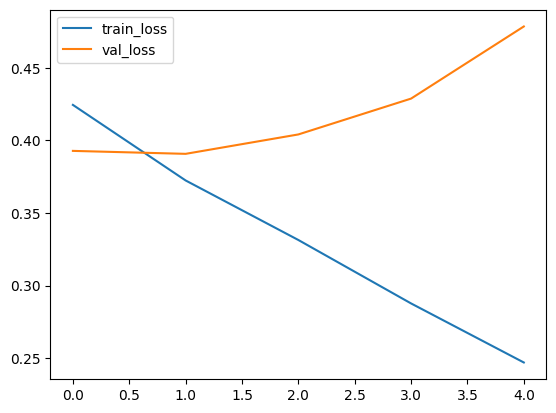

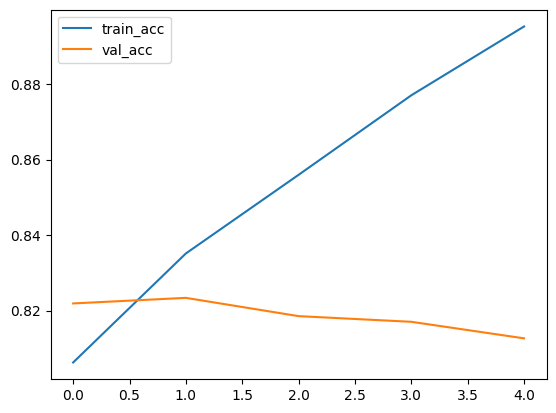

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

From the loss curves, it is clear that the model starts to overfit after just ~3–5 epochs. While the training loss decreases consistently, the validation loss increases, showing that the model memorizes the training data rather than generalizing.

In [36]:
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=0)
print("The loss is: ", loss)
print("The accuracy is: ", accuracy)

The loss is:  0.48465555906295776
The accuracy is:  0.809653103351593


### CNN Results
The CNN model achieved a loss of **0.4877** and an accuracy of **81.0%**, which is a clear improvement compared to the rule-based VADER approach. This shows that the neural network is able to capture more nuanced sentiment patterns in the data than lexicon-based methods. However, while the results are promising, the performance is still not at the level we aim for, indicating that CNN may not be the most suitable architecture for this task. Further exploration with sequential or transformer-based models could lead to better results.

# Bidirectional LSTM Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(X_train_padded, y_train,
                    epochs=5,
                    batch_size=128,
                   validation_split=0.1,
                   verbose = 1)

Epoch 1/5
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 110s 12ms/step - accuracy: 0.7851 - loss: 0.4529 - val_accuracy: 0.8218 - val_loss: 0.3957
Epoch 2/5
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 103s 11ms/step - accuracy: 0.8300 - loss: 0.3801 - val_accuracy: 0.8252 - val_loss: 0.3885
Epoch 3/5
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 103s 11ms/step - accuracy: 0.8423 - loss: 0.3563 - val_accuracy: 0.8231 - val_loss: 0.3916
Epoch 4/5
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 104s 11ms/step - accuracy: 0.8542 - loss: 0.3317 - val_accuracy: 0.8253 - val_loss: 0.3953
Epoch 5/5
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 104s 12ms/step - accuracy: 0.8647 - loss: 0.3101 - val_accuracy: 0.8228 - val_loss: 0.4089


## Evaluate Bidirectional LSTM

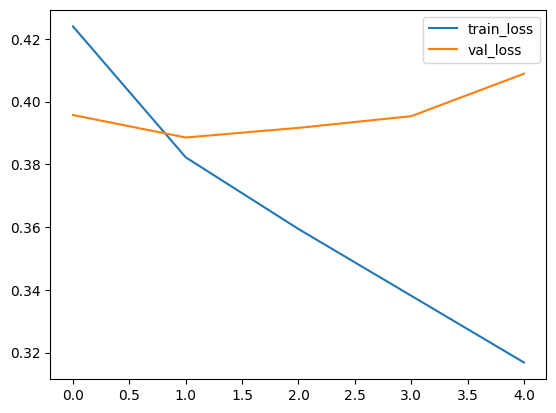

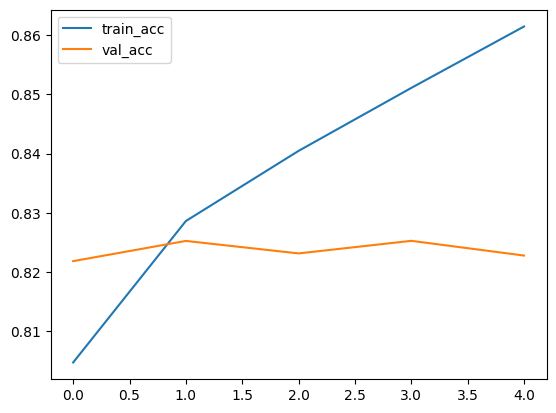

In [39]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

From the loss curves, it is clear that the model starts to overfit after just ~3–5 epochs. While the training loss decreases consistently, the validation loss increases, showing that the model memorizes the training data rather than generalizing.

In [40]:
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=0)
print("The loss is: ", loss)
print("The accuracy is: ", accuracy)

The loss is:  0.4080505669116974
The accuracy is:  0.8212437629699707


### Bidirectional LSTM Results
The Bidirectional LSTM model achieved a loss of **0.4124** and an accuracy of **82.1%**, which is a clear improvement compared to the rule-based VADER approach. This shows that the Bidirectional LSTM is able to capture more nuanced sentiment patterns in the data than lexicon-based methods. However, while the results are promising.